In [1]:
# Import the libraries
import os
import tensorflow as tf
import matplotlib.pyplot as plt 

2026-02-21 18:50:18.957700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771699819.198667      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771699819.263227      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771699819.791128      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771699819.791233      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771699819.791240      17 computation_placer.cc:177] computation placer alr

In [2]:
# Directories
TRAIN_DIR = "/kaggle/input/datasets/lordtesla77/horse-and-human/Files/data/train"
VAL_DIR = "/kaggle/input/datasets/lordtesla77/horse-and-human/Files/data/validation"

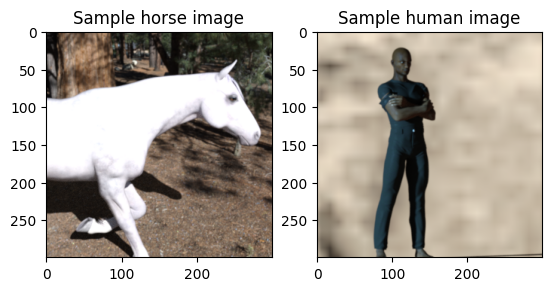

In [3]:
# Directories for each class

horses_dir = os.path.join(TRAIN_DIR ,'horses')
humans_dir = os.path.join(TRAIN_DIR,'humans')

#Load the first example of each one of the classes
sample_image_horse = tf.keras.preprocessing.image.load_img(os.path.join(horses_dir,os.listdir(horses_dir)[0]))
sample_image_human = tf.keras.preprocessing.image.load_img(os.path.join(humans_dir,os.listdir(humans_dir)[0]))

ax = plt.subplot(1,2,1)
ax.imshow(sample_image_horse)
ax.set_title('Sample horse image')

ax = plt.subplot(1,2,2)
ax.imshow(sample_image_human)
ax.set_title('Sample human image')
plt.show()

In [4]:
# Convert the image into its numpy array representation
sample_array = tf.keras.preprocessing.image.img_to_array(sample_image_horse)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (300, 300, 3)


In [5]:
def train_val_datasets():
    """Creates training and validation datasets

    Returns:
        (tf.data.Dataset, tf.data.Dataset): training and validation datasets
    """

    ### START CODE HERE ###

    training_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=TRAIN_DIR,
        batch_size=32,
        image_size=(150,150),
        shuffle=True, 
        seed=7 
    ) 
    
    validation_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=VAL_DIR,
        batch_size=32,
        image_size=(150,150),
        shuffle=True, 
        seed=7 
    ) 

    ### END CODE HERE ###
                                                                        
    return training_dataset, validation_dataset

In [6]:
# Test your generators
training_dataset, validation_dataset = train_val_datasets()

Found 1027 files belonging to 2 classes.


2026-02-21 18:50:49.244830: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 256 files belonging to 2 classes.


In [7]:
val_batches = int(validation_dataset.cardinality())
test_dataset, validation_dataset = tf.keras.utils.split_dataset(validation_dataset, val_batches//5)

print(f'Number of validation batches: {validation_dataset.cardinality()}')
print(f'Number of test batches: {test_dataset.cardinality()}')

Number of validation batches: 7
Number of test batches: 1


In [8]:
# Define the path to the inception v3 weights
LOCAL_WEIGHTS_FILE = "/kaggle/input/datasets/lordtesla77/inception-model/Files/model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [9]:
def create_pre_trained_model():
    
    pre_trained_model = tf.keras.applications.inception_v3.InceptionV3( 
        include_top=False, 
        input_shape=(150,150,3),
        weights=None
    ) 
    
    pre_trained_model.load_weights(LOCAL_WEIGHTS_FILE)
    pre_trained_model.trainable = False

    
    return pre_trained_model

In [10]:
# Create the pre-trained model
pre_trained_model = create_pre_trained_model()

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 35, 35,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [11]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy']>0.999:
            self.model.stop_training = True
            print("\nReached 99.9% accuracy so cancelling training!")

In [12]:
def output_of_last_layer(pre_trained_model):
    
    last_desired_layer =  pre_trained_model.get_layer('mixed7')
    last_output = last_desired_layer.output
    
    print('last layer output shape: ', last_output.shape)
    
    return last_output

In [13]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)


In [14]:
def create_final_model(pre_trained_model, last_output):
    
    
    x = tf.keras.layers.Flatten()(last_output)
    x = tf.keras.layers.Dense(1024,activation="relu")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(1,activation="sigmoid")(x)

    
    model = tf.keras.Model(inputs=pre_trained_model.input, outputs=x)
    model.compile( 
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001), 
        loss="binary_crossentropy", 
        metrics=['accuracy'] 
    )
  
    return model

In [15]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

In [16]:
# Define the preprocess function
def preprocess(image, label):
    image = tf.keras.applications.inception_v3.preprocess_input(image)
    return image, label

# Apply the preprocessing to all datasets
training_dataset = training_dataset.map(preprocess)
validation_dataset = validation_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

In [17]:
history = model.fit(
    training_dataset,
    validation_data = validation_dataset,
    epochs = 100,
    verbose = 2,
    callbacks = [EarlyStoppingCallback()],
)

Epoch 1/100
33/33 - 43s - 1s/step - accuracy: 0.9747 - loss: 0.1211 - val_accuracy: 0.9732 - val_loss: 0.0825
Epoch 2/100
33/33 - 34s - 1s/step - accuracy: 0.9981 - loss: 0.0157 - val_accuracy: 0.9777 - val_loss: 0.0480
Epoch 3/100

Reached 99.9% accuracy so cancelling training!
33/33 - 35s - 1s/step - accuracy: 0.9990 - loss: 0.0060 - val_accuracy: 0.9777 - val_loss: 0.0408


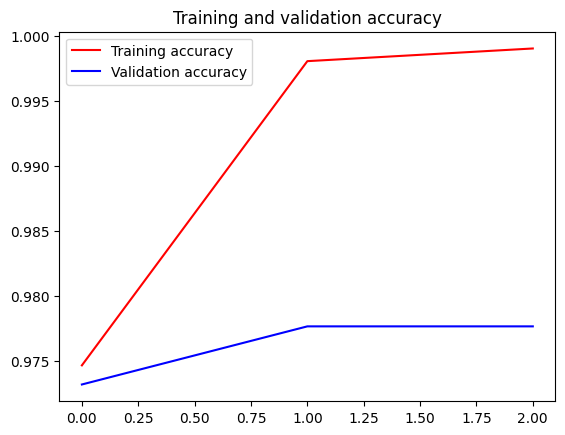

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [19]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test loss: {test_loss},\nTest accuracy: {test_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step - accuracy: 1.0000 - loss: 0.0180
Test loss: 0.018049828708171844,
Test accuracy: 1.0
